### Herkese selamlar bu veri çalışmasında amacımız bir bisiklet firmasına ait bisiklet alıp almayan insanların bilgilerini değerlendirip bu verileri kullanarak yeni insanların bisiklet alıp almayacağı tahminleme modeli oluşturmaktır.Bu çalışmanın devamı "bicycle_LogisticRegressionPrediction2" adlı dosyadadır.

### Veriyi Hazırlama

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [3]:
#Veri tablosunu okuma
df = pd.read_excel (r'C:\Users\samay\Downloads\Data.xlsx')

In [4]:
#Burada Notebookta görüntüleyeceğimiz tablonun tüm satır sütunlarını daraltma olmadan görebilmemiz için işlem yaptık.
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)

In [21]:
df.head()

,CustomerKey,GeographyKey,CustomerAlternateKey,Title,FirstName,MiddleName,LastName,NameStyle,BirthDate,MaritalStatus,Suffix,Gender,EmailAddress,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,SpanishEducation,FrenchEducation,EnglishOccupation,SpanishOccupation,FrenchOccupation,HouseOwnerFlag,NumberCarsOwned,AddressLine1,AddressLine2,Phone,DateFirstPurchase,CommuteDistance,Region,Age,BikeBuyer
0,11000,26,AW00011000,NaN,Jon,V,Yang,0,1971-10-06,M,NaN,M,jon24@adventure-works.com,90000,2,0,Bachelors,Licenciatura,Bac + 4,Professional,Profesional,Cadre,1,0,3761 N. 14th St,NaN,1 (11) 500 555-0162,2011-01-19,1-2 Miles,Pacific,48,1
1,11001,37,AW00011001,NaN,Eugene,L,Huang,0,1976-05-10,S,NaN,M,eugene10@adventure-works.com,60000,3,3,Bachelors,Licenciatura,Bac + 4,Professional,Profesional,Cadre,0,1,2243 W St.,NaN,1 (11) 500 555-0110,2011-01-15,0-1 Miles,Pacific,43,1
2,11002,31,AW00011002,NaN,Ruben,NaN,Torres,0,1971-02-09,M,NaN,M,ruben35@adventure-works.com,60000,3,3,Bachelors,Licenciatura,Bac + 4,Professional,Profesional,Cadre,1,1,5844 Linden Land,NaN,1 (11) 500 555-0184,2011-01-07,2-5 Miles,Pacific,49,1
3,11003,11,AW00011003,NaN,Christy,NaN,Zhu,0,1973-08-14,S,NaN,F,christy12@adventure-works.com,70000,0,0,Bachelors,Licenciatura,Bac + 4,Professional,Profesional,Cadre,0,1,1825 Village Pl.,NaN,1 (11) 500 555-0162,2010-12-29,5-10 Miles,Pacific,46,1
4,11004,19,AW00011004,NaN,Elizabeth,NaN,Johnson,0,1979-08-05,S,NaN,F,elizabeth5@adventure-works.com,80000,5,5,Bachelors,Licenciatura,Bac + 4,Professional,Profesional,Cadre,1,4,7553 Harness Circle,NaN,1 (11) 500 555-0131,2011-01-23,1-2 Miles,Pacific,40,1


In [6]:
#Burada NaN değer kontrolü ve sütun veri tipi kontrolü yapıyoruz.Nan değerleri olan sütunlar makine öğrenmesi modelimizde sorun çıkartır.
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18484 entries, 0 to 18483
Data columns (total 32 columns):
CustomerKey             18484 non-null int64
GeographyKey            18484 non-null int64
CustomerAlternateKey    18484 non-null object
Title                   101 non-null object
FirstName               18484 non-null object
MiddleName              10654 non-null object
LastName                18484 non-null object
NameStyle               18484 non-null int64
BirthDate               18484 non-null datetime64[ns]
MaritalStatus           18484 non-null object
Suffix                  3 non-null object
Gender                  18484 non-null object
EmailAddress            18484 non-null object
YearlyIncome            18484 non-null int64
TotalChildren           18484 non-null int64
NumberChildrenAtHome    18484 non-null int64
EnglishEducation        18484 non-null object
SpanishEducation        18484 non-null object
FrenchEducation         18484 non-null object
EnglishOccupation    

CustomerKey                 0
GeographyKey                0
CustomerAlternateKey        0
Title                   18383
FirstName                   0
MiddleName               7830
LastName                    0
NameStyle                   0
BirthDate                   0
MaritalStatus               0
Suffix                  18481
Gender                      0
EmailAddress                0
YearlyIncome                0
TotalChildren               0
NumberChildrenAtHome        0
EnglishEducation            0
SpanishEducation            0
FrenchEducation             0
EnglishOccupation           0
SpanishOccupation           0
FrenchOccupation            0
HouseOwnerFlag              0
NumberCarsOwned             0
AddressLine1                0
AddressLine2            18172
Phone                       0
DateFirstPurchase           0
CommuteDistance             0
Region                      0
Age                         0
BikeBuyer                   0
dtype: int64

In [7]:
#Burada bisiklet almayı etkileyen sütunların değer kontrolünü yapıyoruz.Eğer az miktarda bile almayı etkilediğini
#düşünürsek oluşturacağımız ana veri tablosuna ekliyoruz
df.Title.unique()

array([nan, 'Mr.', 'Ms.', 'Mrs.', 'Sr.', 'Ms'], dtype=object)

In [8]:
#Üzerinde çalışma yapacağımız sütunlardan oluşan ana veri tablomuzu oluşturuyoruz
main_df=df[['MaritalStatus','Gender','EnglishEducation','EnglishOccupation','CommuteDistance','HouseOwnerFlag','Region',\
            'YearlyIncome','TotalChildren','NumberChildrenAtHome','NumberCarsOwned','Age','BikeBuyer']]

In [9]:
main_df.head()

,MaritalStatus,Gender,EnglishEducation,EnglishOccupation,CommuteDistance,HouseOwnerFlag,Region,YearlyIncome,TotalChildren,NumberChildrenAtHome,NumberCarsOwned,Age,BikeBuyer
0,M,M,Bachelors,Professional,1-2 Miles,1,Pacific,90000,2,0,0,48,1
1,S,M,Bachelors,Professional,0-1 Miles,0,Pacific,60000,3,3,1,43,1
2,M,M,Bachelors,Professional,2-5 Miles,1,Pacific,60000,3,3,1,49,1
3,S,F,Bachelors,Professional,5-10 Miles,0,Pacific,70000,0,0,1,46,1
4,S,F,Bachelors,Professional,1-2 Miles,1,Pacific,80000,5,5,4,40,1


In [10]:
main_df.HouseOwnerFlag.value_counts()

1    12502
0     5982
Name: HouseOwnerFlag, dtype: int64

In [11]:
#Burada tek tek object tipteki veri sütunlarının farklı değerlerini kontrol ettik.'?,!,.' gibi aykırı işaretler olup olmadığına baktık.
#main_df.EnglishOccupation.value_counts(),main_df.Gender.value_counts(),main_df.EnglishEducation.value_counts() vs.
main_df.CommuteDistance.value_counts()

0-1 Miles     6310
2-5 Miles     3234
1-2 Miles     3232
5-10 Miles    3214
10+ Miles     2494
Name: CommuteDistance, dtype: int64

In [12]:
#Burada yazı tipi(object) tüm sütunların önden ve arkadan boşlukları varsa o boşlukların hepsini yok ediyoruz
main_df.columns = main_df.columns.str.strip()

In [13]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18484 entries, 0 to 18483
Data columns (total 13 columns):
MaritalStatus           18484 non-null object
Gender                  18484 non-null object
EnglishEducation        18484 non-null object
EnglishOccupation       18484 non-null object
CommuteDistance         18484 non-null object
HouseOwnerFlag          18484 non-null int64
Region                  18484 non-null object
YearlyIncome            18484 non-null int64
TotalChildren           18484 non-null int64
NumberChildrenAtHome    18484 non-null int64
NumberCarsOwned         18484 non-null int64
Age                     18484 non-null int64
BikeBuyer               18484 non-null int64
dtypes: int64(7), object(6)
memory usage: 1.8+ MB


In [14]:
#Burada Ev ile işyeri arasındaki uzaklığı modelin kategorik şekilde değil numerik şekilde lineer olarak dikkate almasını sağladım. 
main_df["CommuteDistanceNumeric"] = np.where(main_df["CommuteDistance"]=="0-1 Miles", 1,\
                                            (np.where(main_df["CommuteDistance"]=="1-2 Miles", 2,\
                                             np.where(main_df["CommuteDistance"]=="2-5 Miles", 4,\
                                             np.where(main_df["CommuteDistance"]=="5-10 Miles", 7,11)))))
                                    
                                             

C:\Users\samay\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [15]:
main_df[['CommuteDistance','CommuteDistanceNumeric']].head(5)

,CommuteDistance,CommuteDistanceNumeric
0,1-2 Miles,2
1,0-1 Miles,1
2,2-5 Miles,4
3,5-10 Miles,7
4,1-2 Miles,2


In [16]:
#Modelimizde kullanmayacağımız CommuteDistance sütununu sildik 
main_df.drop(columns='CommuteDistance',inplace=True)

C:\Users\samay\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [17]:
#Burada kategorik sütunları veri setine tanıttık
main_df["MaritalStatus"] = main_df["MaritalStatus"].astype('category')
main_df["Gender"] = main_df["Gender"].astype('category')
main_df["EnglishEducation"] = main_df["EnglishEducation"].astype('category')
main_df["EnglishOccupation"] = main_df["EnglishOccupation"].astype('category')
main_df["Region"] = main_df["Region"].astype('category')
main_df["HouseOwnerFlag"] = main_df["HouseOwnerFlag"].astype('category')

C:\Users\samay\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\samay\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\samay\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [18]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18484 entries, 0 to 18483
Data columns (total 13 columns):
MaritalStatus             18484 non-null category
Gender                    18484 non-null category
EnglishEducation          18484 non-null category
EnglishOccupation         18484 non-null category
HouseOwnerFlag            18484 non-null category
Region                    18484 non-null category
YearlyIncome              18484 non-null int64
TotalChildren             18484 non-null int64
NumberChildrenAtHome      18484 non-null int64
NumberCarsOwned           18484 non-null int64
Age                       18484 non-null int64
BikeBuyer                 18484 non-null int64
CommuteDistanceNumeric    18484 non-null int32
dtypes: category(6), int32(1), int64(6)
memory usage: 1.0 MB


### Veri Analizi

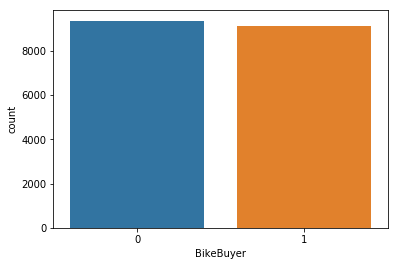

In [366]:
sns.countplot(x='BikeBuyer',data=df)

Toplamda 18484 adet müşteri bilgisi yaklaşık ikiye bölünerek bisiklet alan,almayan sayısı oluşturulmuş

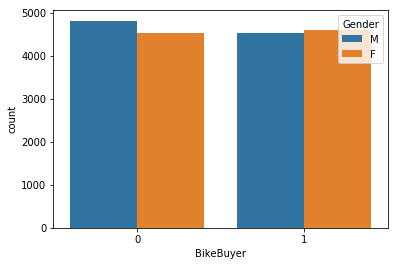

In [367]:
sns.countplot(x='BikeBuyer',hue='Gender',data=df)

Cinsiyet dağılımının da yaklaşık oranlarda dağıldığını görüyoruz.

Text(0, 0.5, 'Sahip olunan çocuk sayılarının toplamı')

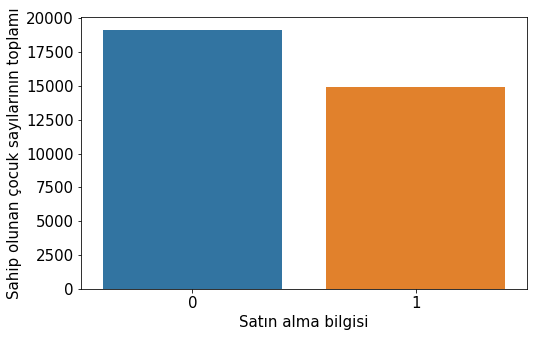

In [387]:
#filtered_buyer=df[df['BikeBuyer']==1]
final_buyer_age=df.groupby('BikeBuyer')['TotalChildren'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=final_buyer_age.index[0:10], y=final_buyer_age.values[0:10])
plt.xticks(rotation= 0,fontsize=15)
plt.yticks(rotation= 0,fontsize=15)
plt.xlabel('Satın alma bilgisi',fontsize=15)
plt.ylabel('Sahip olunan çocuk sayılarının toplamı',fontsize=15)

Bisiklet alan insanların almayanlara göre daha az çocuğa sahip olduğunu görüyoruz :)

Text(0, 0.5, 'Gelir Toplamı')

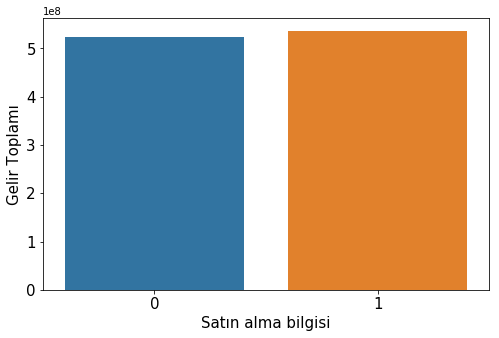

In [388]:
final_buyer_age=df.groupby('BikeBuyer')['YearlyIncome'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=final_buyer_age.index[0:10], y=final_buyer_age.values[0:10])
plt.xticks(rotation= 0,fontsize=15)
plt.yticks(rotation= 0,fontsize=15)
plt.xlabel('Satın alma bilgisi',fontsize=15)
plt.ylabel('Gelir Toplamı',fontsize=15)

Görüldüğü üzere bisiklet alan insanlar ile almayan insanların gelir düzeyleri yakın tutulmuş.

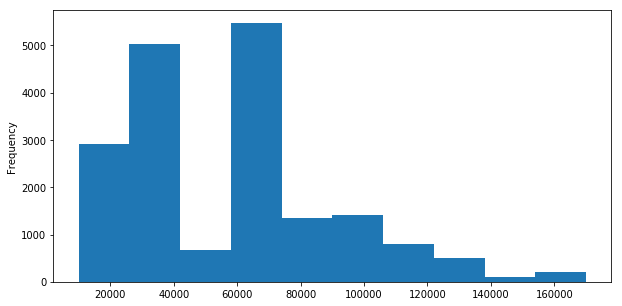

In [390]:
df['YearlyIncome'].plot.hist(figsize=(10,5))

Şu anda veri setindeki müşterilerin genel yıllık gelir dağılımını görüyoruz.Acaba yıllık geliri 100 bin dolardan fazla olan zenginlerin bisiklet alıp almama durumları nedir?

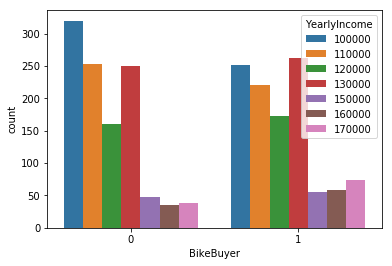

In [401]:
filtered_buyer=df[df['YearlyIncome']>=100000]
sns.countplot(x='BikeBuyer',hue='YearlyIncome',data=filtered_buyer)

Bu kişiler de veri setinde alıp almama durumu için eşit dağıtılmış

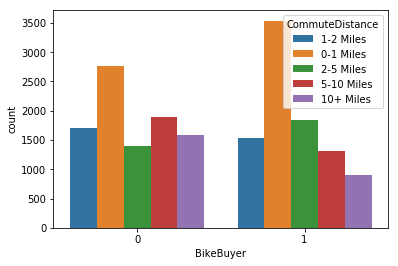

In [402]:
sns.countplot(x='BikeBuyer',hue='CommuteDistance',data=df)

Ev-iş arası mesafenin bisiklet alımına etkisi

-------

### Veri analizimizden sonra hangi sütunların sonuca daha fazla etki ettiğini öğrenmemiz modelimizin tahminleme başarısını(accuracy score) arttıracaktır.Bu yüzden şimdi etkili sütunlara karar vermek için univariate selection,feature importance,correlation matrix with heatmap yöntemlerine bakalım

**Univariate Selection**

In [19]:
#Burada Label coding yaptık
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
main_df["MaritalStatus"] = lb_make.fit_transform(main_df["MaritalStatus"])
main_df["Gender"] = lb_make.fit_transform(main_df["Gender"])
main_df["EnglishEducation"] = lb_make.fit_transform(main_df["EnglishEducation"])
main_df["EnglishOccupation"] = lb_make.fit_transform(main_df["EnglishOccupation"])
main_df["Region"] = lb_make.fit_transform(main_df["Region"])

C:\Users\samay\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\samay\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\samay\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#

In [20]:
main_df.head()

,MaritalStatus,Gender,EnglishEducation,EnglishOccupation,HouseOwnerFlag,Region,YearlyIncome,TotalChildren,NumberChildrenAtHome,NumberCarsOwned,Age,BikeBuyer,CommuteDistanceNumeric
0,0,1,0,3,1,2,90000,2,0,0,48,1,2
1,1,1,0,3,0,2,60000,3,3,1,43,1,1
2,0,1,0,3,1,2,60000,3,3,1,49,1,4
3,1,0,0,3,0,2,70000,0,0,1,46,1,7
4,1,0,0,3,1,2,80000,5,5,4,40,1,2


In [22]:
#Burada modelimizi feature(X) ve label(y) olarak ayırıyoruz
X=main_df.drop('BikeBuyer',axis='columns')
y=main_df.iloc[:,-2]

In [23]:
X_2=X.drop('Gender',axis='columns')

In [24]:
X_2=X_2.drop('HouseOwnerFlag',axis='columns')

In [25]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#SelectKBest sınıfını uygulaarak en iyi 10 feature ı elde etme
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#Daha iyi görselleştirme için 2 veri çerçevesini birleştirme
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print 10 best features

                     Specs          Score
6             YearlyIncome  637659.024717
11  CommuteDistanceNumeric     935.102033
10                     Age     540.040749
9          NumberCarsOwned     521.427063
7            TotalChildren     421.237092
8     NumberChildrenAtHome     320.866825
2         EnglishEducation     248.168365
0            MaritalStatus      41.067985
5                   Region      29.171575
3        EnglishOccupation       7.203659
1                   Gender       3.080213
4           HouseOwnerFlag       0.335929


**FEATURE IMPORTANCE**

In [309]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)

[0.04234299 0.03485695 0.06270776 0.04746835 0.02819985 0.04061525
 0.1318933  0.09088626 0.06805754 0.09960869 0.2589933  0.09436977]


C:\Users\samay\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


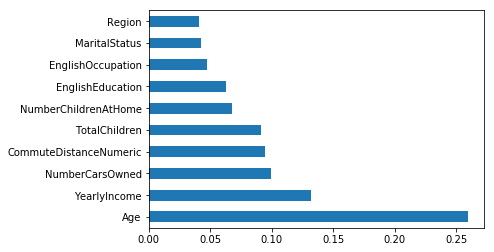

In [310]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

**Correlation Matrix with Heatmap**

In [311]:
import seaborn as sns

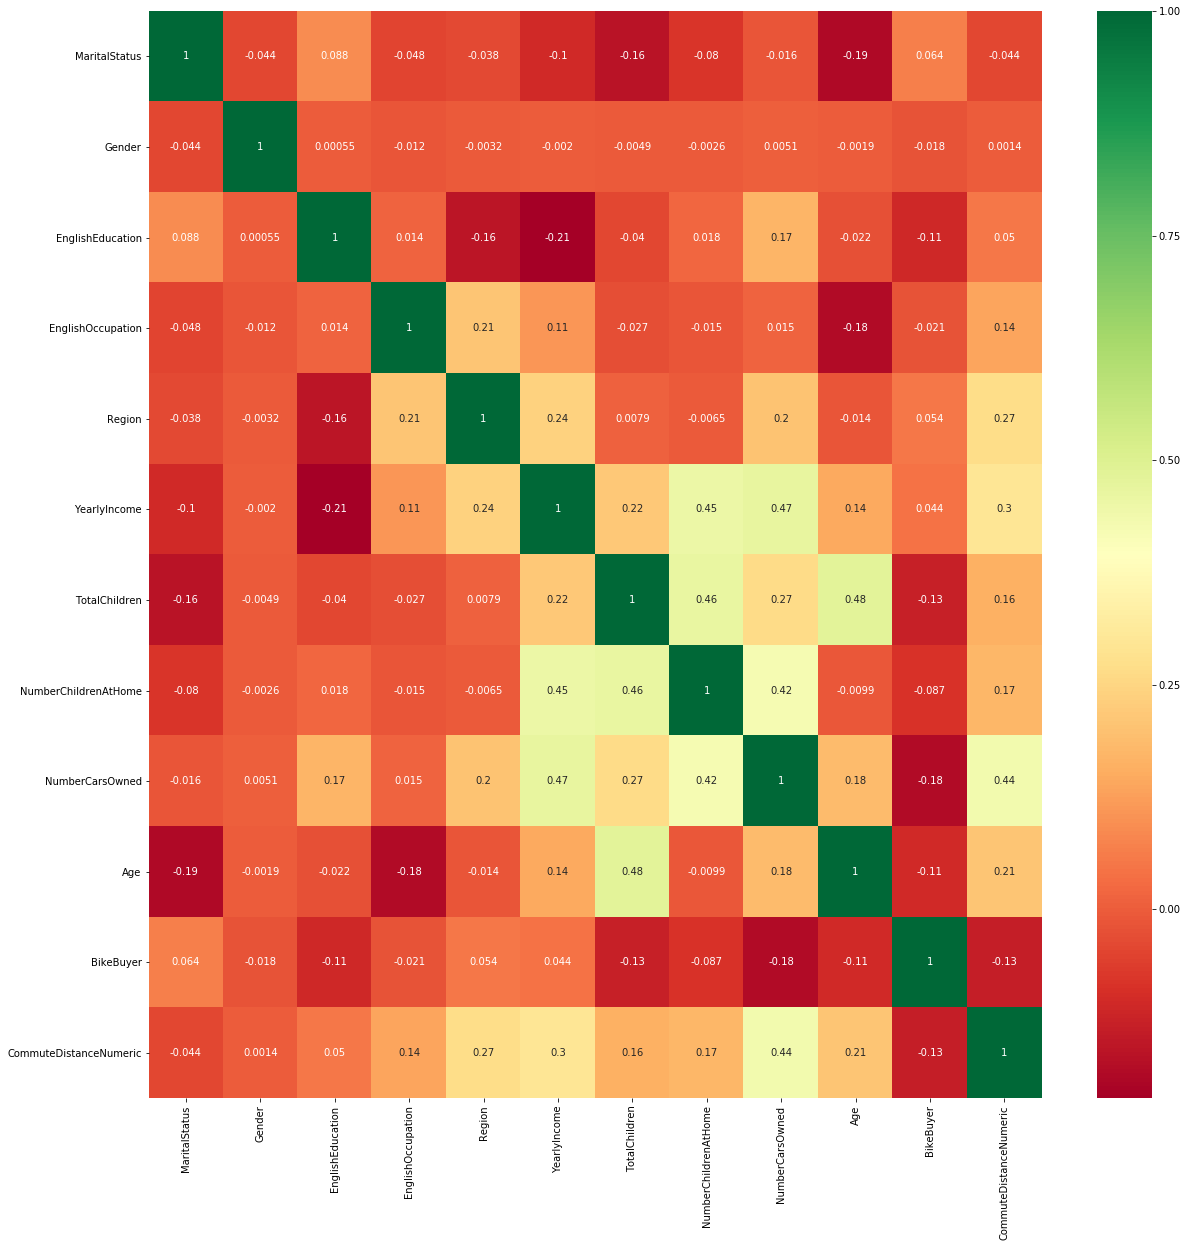

In [312]:
corrmat = main_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(main_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Bu kadar feature selection kısmındaki gözlemlerimizden Gender ve HouseOwnerFlag'ın dahil edilmemesiyle daha yüksek accuracy oranlı bir model elde edilebildiği sonucuna ulaştık

------

### Şimdi column_transformer yöntemiyle sadece kategorik değişkenlere One Hot Encoding uygulayalım

One Hot Encoding metodu modelimizin daha iyi tahminleme sonucu vermesini sağlar. 

In [26]:
from sklearn.compose import make_column_transformer

In [27]:
X.head()

,MaritalStatus,Gender,EnglishEducation,EnglishOccupation,HouseOwnerFlag,Region,YearlyIncome,TotalChildren,NumberChildrenAtHome,NumberCarsOwned,Age,CommuteDistanceNumeric
0,0,1,0,3,1,2,90000,2,0,0,48,2
1,1,1,0,3,0,2,60000,3,3,1,43,1
2,0,1,0,3,1,2,60000,3,3,1,49,4
3,1,0,0,3,0,2,70000,0,0,1,46,7
4,1,0,0,3,1,2,80000,5,5,4,40,2


In [29]:
from sklearn.preprocessing import OneHotEncoder

In [30]:
column_trans=make_column_transformer((OneHotEncoder(),['MaritalStatus','Gender','EnglishEducation','EnglishOccupation',\
                                                       'HouseOwnerFlag','Region']),remainder='passthrough')

In [31]:
column_trans2=make_column_transformer((OneHotEncoder(),['MaritalStatus','EnglishEducation','EnglishOccupation',\
                                                       'Region']),remainder='passthrough')

In [32]:
column_trans.fit_transform(X)


C:\Users\samay\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[ 1.,  0.,  0., ...,  0., 48.,  2.],
       [ 0.,  1.,  0., ...,  1., 43.,  1.],
       [ 1.,  0.,  0., ...,  1., 49.,  4.],
       ...,
       [ 0.,  1.,  0., ...,  0., 54.,  1.],
       [ 1.,  0.,  0., ...,  0., 55.,  1.],
       [ 1.,  0.,  0., ...,  0., 54.,  1.]])

In [33]:
column_trans2.fit_transform(X_2)


C:\Users\samay\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[ 1.,  0.,  1., ...,  0., 48.,  2.],
       [ 0.,  1.,  1., ...,  1., 43.,  1.],
       [ 1.,  0.,  1., ...,  1., 49.,  4.],
       ...,
       [ 0.,  1.,  0., ...,  0., 54.,  1.],
       [ 1.,  0.,  1., ...,  0., 55.,  1.],
       [ 1.,  0.,  1., ...,  0., 54.,  1.]])

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
logreg=LogisticRegression(solver='newton-cg')

In [36]:
from sklearn.pipeline import make_pipeline

In [37]:
pipe=make_pipeline(column_trans,logreg)

In [38]:
pipe2=make_pipeline(column_trans2,logreg)

In [39]:
from sklearn.model_selection import cross_val_score

In [40]:
#Bizim kullandığımız ilk model accuracy sonucumuz
cross_val_score(pipe,X,y,cv=5,scoring='accuracy').mean()

C:\Users\samay\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\samay\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\samay\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWar

C:\Users\samay\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\samay\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\samay\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWar

0.6363476864761343

In [346]:
#Gender ve HouseOwnerFlag sütunlarını eledikten sonraki accuracy sonucumuz
cross_val_score(pipe2,X_2,y,cv=5,scoring='accuracy').mean()

C:\Users\samay\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\samay\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\samay\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWar

C:\Users\samay\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\samay\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\samay\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\samay\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\samay\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

0.6364019453594901

In [294]:
X.columns

Index(['MaritalStatus', 'Gender', 'EnglishEducation', 'EnglishOccupation', 'HouseOwnerFlag', 'Region', 'YearlyIncome', 'TotalChildren',
       'NumberChildrenAtHome', 'NumberCarsOwned', 'Age', 'CommuteDistanceNumeric'],
      dtype='object')

In [295]:
X2.columns

Index(['Gender', 'EnglishEducation', 'EnglishOccupation', 'HouseOwnerFlag', 'Region', 'YearlyIncome', 'NumberChildrenAtHome', 'NumberCarsOwned',
       'Age', 'CommuteDistanceNumeric'],
      dtype='object')

### Şimdi yeni gelen müşteri bilgisi oluşturmak için veri setimizdeki herhangi 5 satırı alalım

In [317]:
X_new=X.sample(5,random_state=99)
X_new

,MaritalStatus,Gender,EnglishEducation,EnglishOccupation,HouseOwnerFlag,Region,YearlyIncome,TotalChildren,NumberChildrenAtHome,NumberCarsOwned,Age,CommuteDistanceNumeric
5471,0,0,2,2,0,0,10000,4,0,2,101,1
12364,1,0,0,3,0,1,40000,0,0,1,50,4
7989,0,0,0,1,1,1,70000,5,0,2,63,4
10396,1,0,3,4,0,1,40000,0,0,2,38,2
758,0,1,0,3,1,2,70000,5,5,3,40,11


In [348]:
pipe.fit(X,y)

C:\Users\samay\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\samay\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\samay\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWar

Pipeline(memory=None,
     steps=[('columntransformer', ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('onehotencoder', OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error...ty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False))])

In [349]:
pipe.predict(X_new)

array([0, 0, 0, 0, 0], dtype=int64)

**Oluşturduğumuz yeni müşteriler modelimize göre bisiklet almıyorlar.Fakat şu anda modelimizin tahminleme başarısı düşük.Bir sonraki dosyada(bicycle_LogisticRegressionPrediction2) tahminleme başarısını nasıl arttırdığımızı göreceksiniz.**
